In [6]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [7]:
from society.beliefs import Distribution, BeliefDistribution
from society.agents import AnalyticalAgent
from society.structure.network import ArtificialNetwork
from society.structure import AgentNetwork
from updates import UpdateRule,Interactions
from simulation import Simulation, Insights
from computations.insights.opinions import number_of_opinions_evaluation_uncertainty
from plotting.summaries import plot_varying_assimilation
import copy

In [8]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.15)
belief_distribution = BeliefDistribution(unique, unique, linespace)
network = ArtificialNetwork(100, "fully_connected")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

In [9]:
simulation_results = []
assimilation_biases = [0.001, 0.005, 0.01, 0.02, 0.05]
for assimilation_bias in assimilation_biases:
    interactions.update_rule.assimilation_bias = assimilation_bias
    simulation.run(interactions, agent_network)
    result = copy.deepcopy(simulation.insights.belief_evolution)
    simulation_results.append(result)

Progress: 100%|██████████| 1000/1000 [00:01<00:00, 680.13it/s]


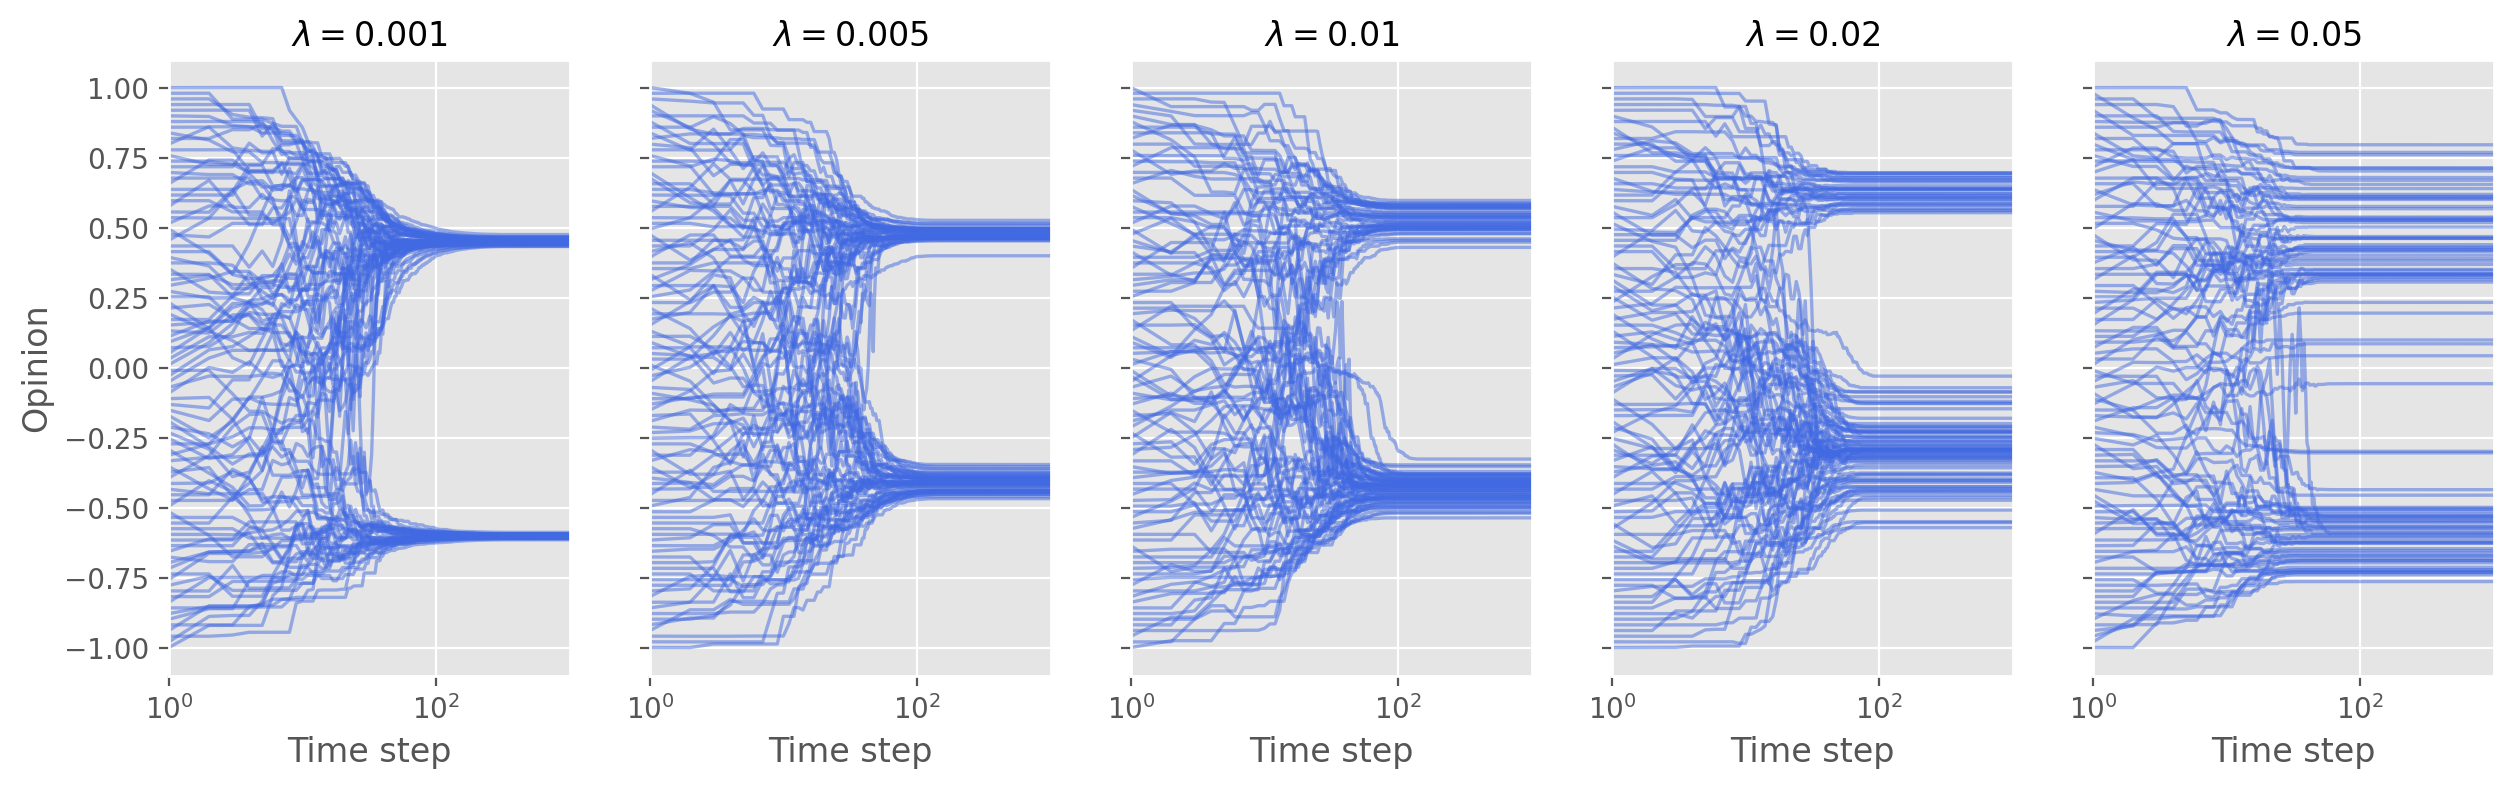

In [10]:
plot_varying_assimilation(simulation_results, assimilation_biases)